# **Preliminary Round FIT Competition 2024**

### **Description:**
Happiness of a city can be a reflection of government success in managing their people and country, not only focusing in physical fields like infrastructure, but also in social problems, economy, and culture. There are many variables that can affect the happiness index of a city, include High GDP per capita, social support in times of need, absence of corruption in government, healthy life expectancy, freedom to make life choices, and generosity or charity towards others.

### **Atribut:**
1.	id - City or Regency identifier
2.	city_or_regency - Name of City or Regency
3.	year - The year in which the data is recorded
4.	total_area - Area of City or Regency (KM^2)
5.	population - The Number of Residents in One City or Regency
6.	densities - Density Level (Population/KM^2)
7.	traffic_density - Categories for Traffic Density (Low/Medium/High)
8.	green_open_space - Area of Green Open Space (KM^2)
9.	hdi - Index of Human Development for Each City or Regency
10.	gross_regional_domestic_product - Total Gross Value Added at Current Prices (Billion Rupiah)
11.	total_landfills - Number of Landfills per City or Regency
12.	solid_waste_generated - The amount of waste each City or Regency generated from various sources for a year (Tens of Tons)
13.	happiness_score - Score to Measure The Level of Happiness for each city or Regency (0 - 100)

### **Business Understanding:**
1.	Background:
  - The happiness of a city is an important indicator of the well-being of its people. Governments are responsible for creating an environment that supports the happiness of citizens by managing various physical, social, economic and cultural aspects.
  - The City Happiness Index is influenced by various factors, including GDP per capita, social support, government corruption, life expectancy, freedom of choice, and generosity.
  - Understanding the factors that influence city happiness can help governments design effective policies to improve the well-being of citizens.
2.	Challenges:
  - Identify the variables that most significantly affect the happiness index.
  - Measure the impact of various social, economic, and environmental factors on citizens' happiness.
  - Collect and analyze data from various cities and districts with different characteristics.
3.	Opportunities:
  - The results of the analysis can provide valuable insights for the government and other stakeholders in designing better policies to improve citizens' happiness.
  - By identifying key factors that affect happiness, the government can allocate resources more efficiently and effectively.

### **Goals:**
  - Goals: Identify the variables that most significantly affect the happiness index of a city or district.
  - Key Performance Indicator: Regression coefficient and significance level for each variable in the regression analysis model.



In [60]:
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
df.head()

,id,city_or_regency,year,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,happiness_score
0,11012022,Simeulue,2022,"1,838.09","94,876",51.62,Low,0.12,67.27,"2,688",1.0,"1,628.09",72.37
1,11032022,Aceh Selatan,2022,"4,173.82","237,376",56.87,Low,NaN,67.87,"6,447",1.0,"3,521.77",72.54
2,11042022,Aceh Tenggara,2022,"4,242.04","228,308",53.82,Low,NaN,70.32,"5,829",1.0,"3,333.30",72.38
3,11062022,Aceh Tengah,2022,"4,527.53","222,673",49.18,Low,1.11,73.95,"8,873",1.0,NaN,71.38
4,11072022,Aceh Barat,2022,"2,927.95","202,858",69.28,Low,0.01,72.34,"12,730",1.0,"3,702.16",72.36


In [62]:
df_test.head()

,id,city_or_regency,year,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated
0,11022022,Aceh Singkil,2022,"1,857.88","130,787",70.40,Low,685.53,69.62,"3,005",1.0,"1,926.13"
1,11052022,Aceh Timur,2022,"6,040.60","432,849",71.66,Low,0.09,68.72,"13,101",2.0,"6,319.60"
2,11092022,Pidie,2022,"3,184.46","444,505",139.59,Low,0.42,71.20,"12,412",1.0,"6,489.77"
3,11182022,Pidie Jaya,2022,952.11,"162,771",170.96,Low,0.05,74.34,"3,980",1.0,"2,902.94"
4,11752022,City of Subulussalam,2022,"1,391.00","95,199",68.44,Low,0.20,66.20,"2,365",1.0,"1,353.00"


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               822 non-null    int64  
 1   city_or_regency                  822 non-null    object 
 2   year                             822 non-null    int64  
 3   total_area (km2)                 822 non-null    object 
 4   population                       822 non-null    object 
 5   densities                        822 non-null    float64
 6   traffic_density                  822 non-null    object 
 7   green_open_space                 434 non-null    object 
 8   hdi                              822 non-null    float64
 9   gross_regional_domestic_product  822 non-null    object 
 10  total_landfills                  420 non-null    float64
 11  solid_waste_generated            428 non-null    object 
 12  happiness_score       

In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               206 non-null    int64  
 1   city_or_regency                  206 non-null    object 
 2   year                             206 non-null    int64  
 3   total_area (km2)                 206 non-null    object 
 4   population                       206 non-null    object 
 5   densities                        206 non-null    float64
 6   traffic_density                  206 non-null    object 
 7   green_open_space                 105 non-null    float64
 8   hdi                              206 non-null    float64
 9   gross_regional_domestic_product  206 non-null    object 
 10  total_landfills                  104 non-null    float64
 11  solid_waste_generated            104 non-null    object 
dtypes: float64(4), int64(2

In [65]:
obj_features = ['total_area (km2)', 'population', 'green_open_space', 'gross_regional_domestic_product', 'solid_waste_generated']

# train dataset
for col in obj_features:
    df[col] = df[col].replace('#REF!', np.nan)
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace(',','').astype(float)

# test dataset
for col in obj_features:
    df_test[col] = df_test[col].replace('#REF!', np.nan)
    df_test[col] = df_test[col].astype(str)
    df_test[col] = df_test[col].str.replace(',','').astype(float)

# Data Understanding

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [67]:
box_feature = ['total_area (km2)', 'population', 'densities', 'green_open_space', 'hdi', 'gross_regional_domestic_product', 'total_landfills', 'solid_waste_generated']

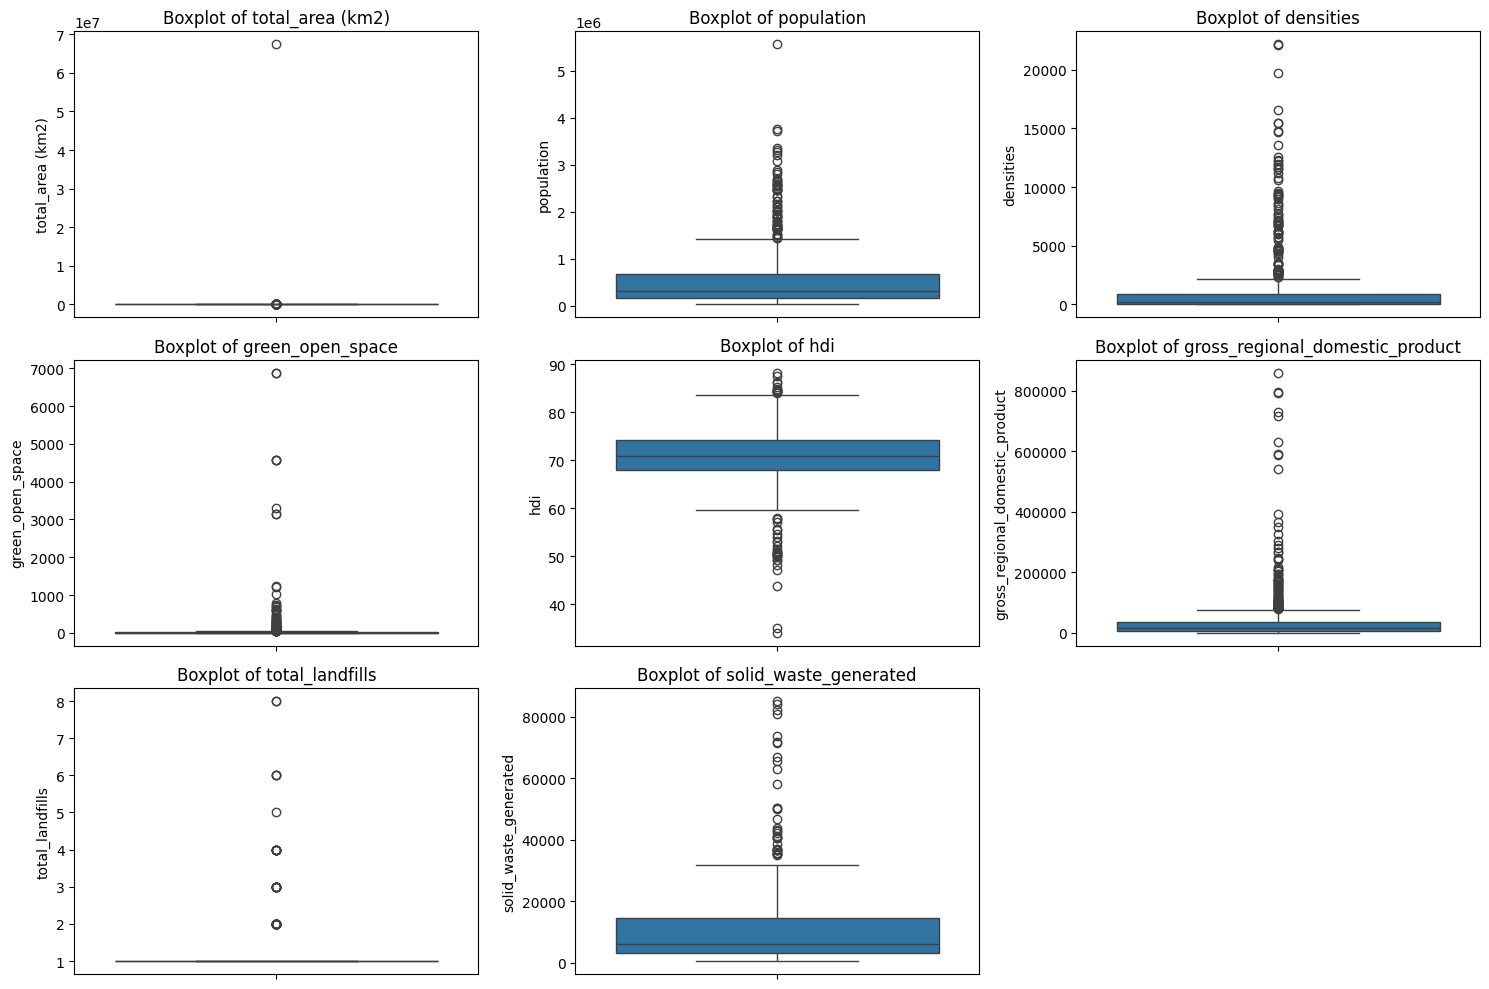

In [68]:
# Plot boxplots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(box_feature, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=feature)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

There is so many outliers in the feature, and we have to normalize the data

### Handle missing value

In [69]:
# df['green_open_space'].fillna(df['green_open_space'].median(), inplace=True)
# df['total_landfills'].fillna(df['total_landfills'].mean(), inplace=True)
# df['solid_waste_generated'].fillna(df['solid_waste_generated'].median(), inplace=True)

In [70]:
df = df.fillna(0)
df_test = df.fillna(0)

### Remove outliers using z-score, IQR and percentile

In [71]:
def remove_outliers_zscore(df, columns, threshold=3):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[z_scores < threshold]
    return df

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
    return df

def remove_outliers_percentile(df, columns, lower_percentile=0.01, upper_percentile=0.99):
    for col in columns:
        lower_bound = df[col].quantile(lower_percentile)
        upper_bound = df[col].quantile(upper_percentile)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

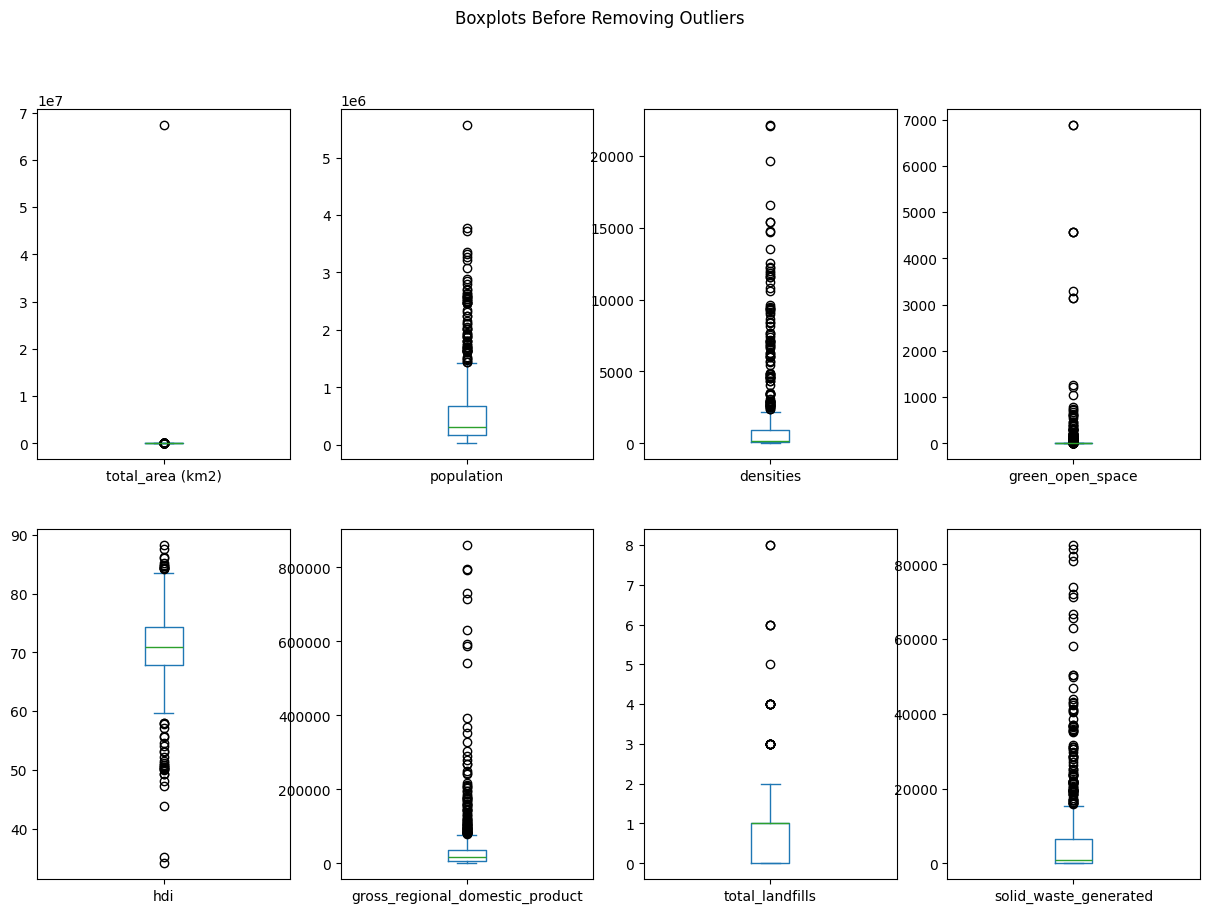

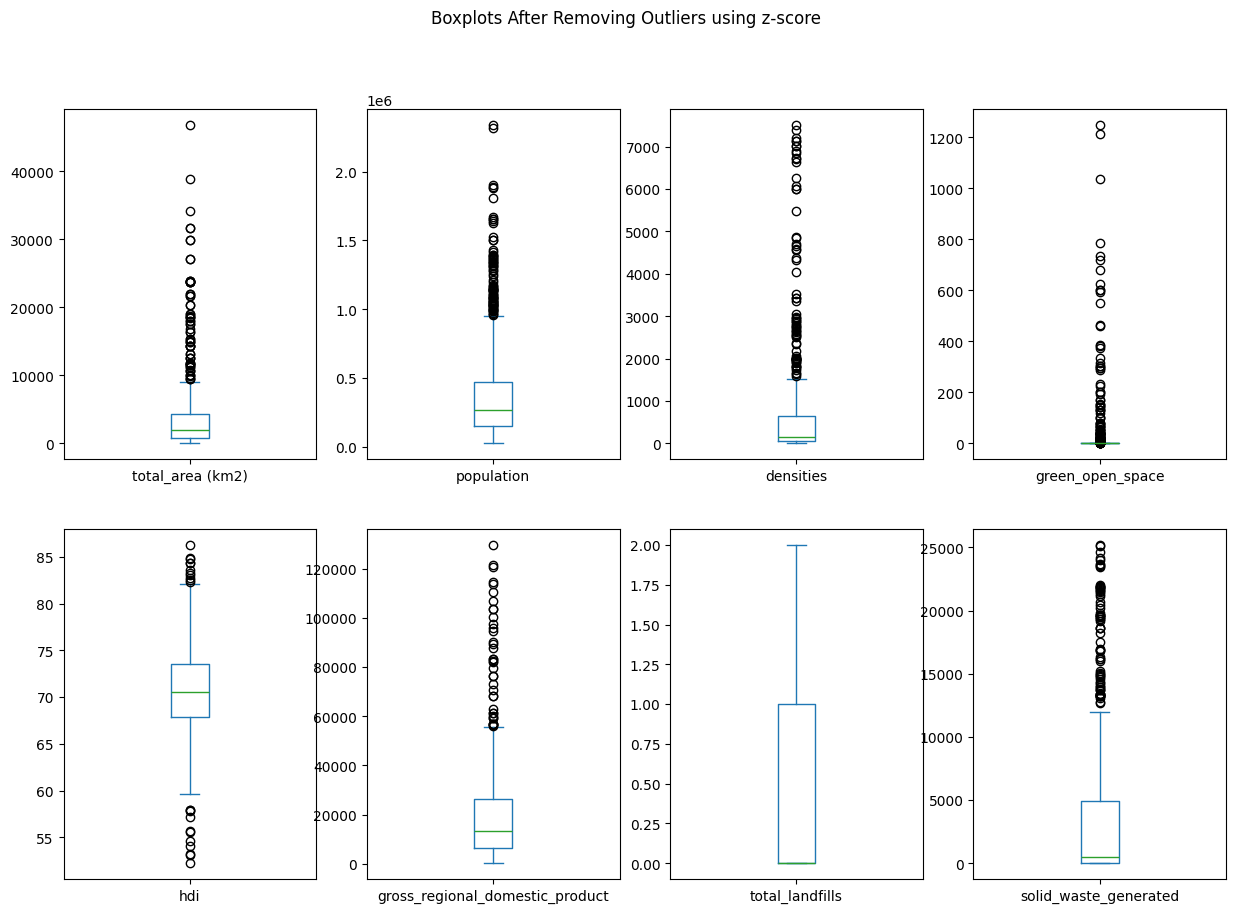

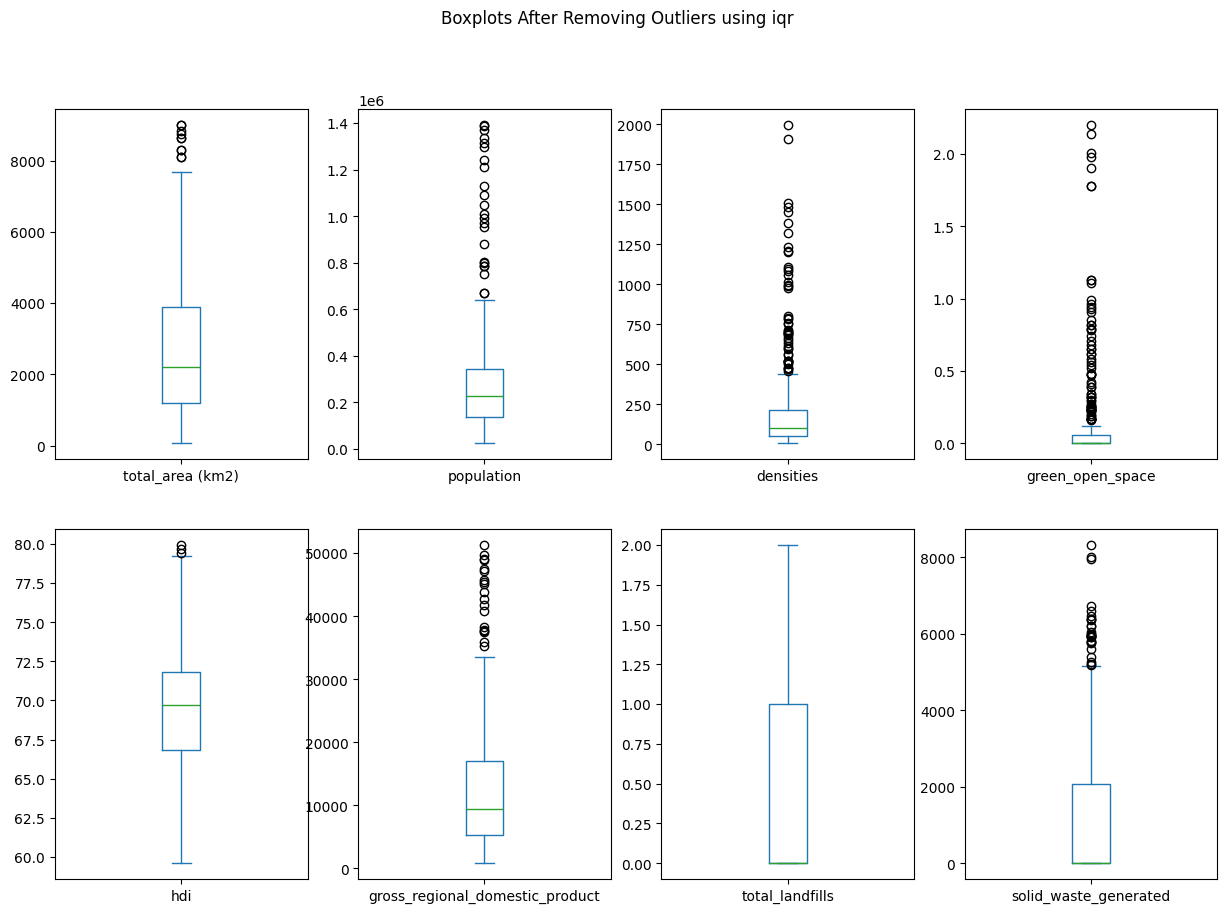

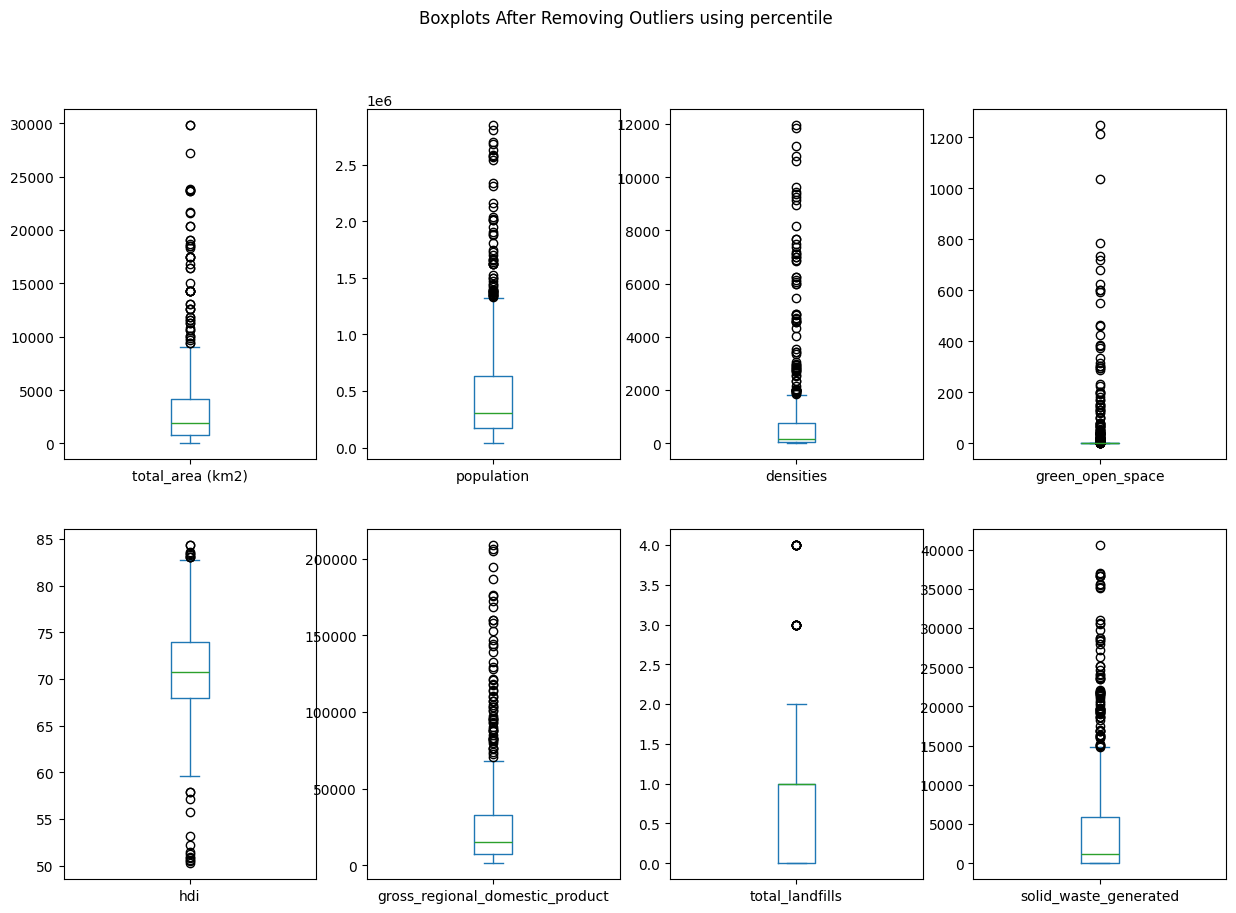

In [72]:
def plot_boxplots(df, columns, title):
    df[columns].plot(kind='box', subplots=True, layout=(2, 4), figsize=(15, 10), title=title)
    plt.show()

# Plot boxplots before removing outliers
plot_boxplots(df, box_feature, 'Boxplots Before Removing Outliers')

# Remove outliers using the chosen method
df_zscore = remove_outliers_zscore(df, box_feature)
df_iqr = remove_outliers_iqr(df, box_feature)
df_percentile = remove_outliers_percentile(df, box_feature)

# Plot boxplots after removing outliers
plot_boxplots(df_zscore, box_feature, 'Boxplots After Removing Outliers using z-score')
plot_boxplots(df_iqr, box_feature, 'Boxplots After Removing Outliers using iqr')
plot_boxplots(df_percentile, box_feature, 'Boxplots After Removing Outliers using percentile')

In [73]:
print(df_iqr.shape)
print(df_zscore.shape)
print(df_percentile.shape)

(375, 13)
(691, 13)
(719, 13)


1. df with outliers : 822
2. df_iqr : 375
3. df_zscore : 691
4. df_percentile : 719

Encode the ordinal feature using ordinal encoder

In [74]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()

df_zscore['traffic_density_encoded'] = ordinal.fit_transform(df_zscore[['traffic_density']])
df_iqr['traffic_density_encoded'] = ordinal.fit_transform(df_iqr[['traffic_density']])
df_percentile['traffic_density_encoded'] = ordinal.fit_transform(df_percentile[['traffic_density']])

# Modelling using zcore dataset

In [75]:
X = df_zscore.drop(['happiness_score', 'traffic_density', 'id', 'city_or_regency', 'year'], axis=1)
y = df_zscore['happiness_score']

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

model_svr = SVR(C=1, epsilon=0.5, gamma=1)

model_svr.fit(X_train, y_train)

y_pred = model_svr.predict(X_test)

print(mean_squared_error(y_test, y_pred))

6.296113365363102


In [78]:
from sklearn.ensemble import RandomForestRegressor

# model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf = RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

print(mean_squared_error(y_test, y_pred))

5.47067412722548


# Modelling using iqr dataset

In [79]:
X = df_iqr.drop(['happiness_score', 'traffic_density', 'id', 'city_or_regency', 'year'], axis=1)
y = df_iqr['happiness_score']

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

model_svr = SVR(C=1, epsilon=0.5, gamma=1)

model_svr.fit(X_train, y_train)

y_pred = model_svr.predict(X_test)

print(mean_squared_error(y_test, y_pred))

7.422208657777781


In [82]:
from sklearn.ensemble import RandomForestRegressor

# model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf = RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

print(mean_squared_error(y_test, y_pred))

5.771767122477852


# Modelling using percentile dataset

In [83]:
df_percentile.head()

,id,city_or_regency,year,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,happiness_score,traffic_density_encoded
0,11012022,Simeulue,2022,1838.09,94876.0,51.62,Low,0.12,67.27,2688.0,1.0,1628.09,72.37,1.0
1,11032022,Aceh Selatan,2022,4173.82,237376.0,56.87,Low,0.00,67.87,6447.0,1.0,3521.77,72.54,1.0
2,11042022,Aceh Tenggara,2022,4242.04,228308.0,53.82,Low,0.00,70.32,5829.0,1.0,3333.30,72.38,1.0
3,11062022,Aceh Tengah,2022,4527.53,222673.0,49.18,Low,1.11,73.95,8873.0,1.0,0.00,71.38,1.0
4,11072022,Aceh Barat,2022,2927.95,202858.0,69.28,Low,0.01,72.34,12730.0,1.0,3702.16,72.36,1.0


In [84]:
X = df_percentile.drop(['happiness_score', 'traffic_density', 'id', 'city_or_regency', 'year'], axis=1)
y = df_percentile['happiness_score']

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [86]:
from sklearn.ensemble import RandomForestRegressor

# model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf = RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

print(mean_squared_error(y_test, y_pred))

4.022091627021927


In [87]:
from xgboost import XGBRFRegressor

model_xgbrf = XGBRFRegressor(colsample_bynode=0.9, learning_rate=0.2, n_estimators=10, subsample=0.8)

model_xgbrf.fit(X_train, y_train)

y_pred = model_xgbrf.predict(X_test)

print(mean_squared_error(y_test, y_pred))

4.93333533374457


Using percentile dataset, Random Forest model has the best evaluate score (MSE)

# Prediction using test dataset

In [88]:
df_test = pd.read_csv('./test.csv')
df_test.head()

,id,city_or_regency,year,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated
0,11022022,Aceh Singkil,2022,"1,857.88","130,787",70.40,Low,685.53,69.62,"3,005",1.0,"1,926.13"
1,11052022,Aceh Timur,2022,"6,040.60","432,849",71.66,Low,0.09,68.72,"13,101",2.0,"6,319.60"
2,11092022,Pidie,2022,"3,184.46","444,505",139.59,Low,0.42,71.20,"12,412",1.0,"6,489.77"
3,11182022,Pidie Jaya,2022,952.11,"162,771",170.96,Low,0.05,74.34,"3,980",1.0,"2,902.94"
4,11752022,City of Subulussalam,2022,"1,391.00","95,199",68.44,Low,0.20,66.20,"2,365",1.0,"1,353.00"


In [89]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               206 non-null    int64  
 1   city_or_regency                  206 non-null    object 
 2   year                             206 non-null    int64  
 3   total_area (km2)                 206 non-null    object 
 4   population                       206 non-null    object 
 5   densities                        206 non-null    float64
 6   traffic_density                  206 non-null    object 
 7   green_open_space                 105 non-null    float64
 8   hdi                              206 non-null    float64
 9   gross_regional_domestic_product  206 non-null    object 
 10  total_landfills                  104 non-null    float64
 11  solid_waste_generated            104 non-null    object 
dtypes: float64(4), int64(2

In [90]:
obj_features = ['total_area (km2)', 'population', 'green_open_space', 'gross_regional_domestic_product', 'solid_waste_generated']

for col in obj_features:
    df_test[col] = df_test[col].replace('#REF!', np.nan)
    df_test[col] = df_test[col].astype(str)
    df_test[col] = df_test[col].str.replace(',','').astype(float)

In [91]:
df_test = df_test.fillna(0)

In [92]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()

df_test['traffic_density_encoded'] = ordinal.fit_transform(df_test[['traffic_density']])

In [93]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               206 non-null    int64  
 1   city_or_regency                  206 non-null    object 
 2   year                             206 non-null    int64  
 3   total_area (km2)                 206 non-null    float64
 4   population                       206 non-null    float64
 5   densities                        206 non-null    float64
 6   traffic_density                  206 non-null    object 
 7   green_open_space                 206 non-null    float64
 8   hdi                              206 non-null    float64
 9   gross_regional_domestic_product  206 non-null    float64
 10  total_landfills                  206 non-null    float64
 11  solid_waste_generated            206 non-null    float64
 12  traffic_density_encode

In [94]:
X = df_test.drop(['traffic_density', 'id', 'city_or_regency', 'year'], axis=1)

y_test_pred = model_rf.predict(X)



In [95]:
sumbission = pd.DataFrame({
    'id' : df_test['id'],
    'happiness_score' : y_test_pred
})

sumbission

,id,happiness_score
0,11022022,73.922675
1,11052022,72.032357
2,11092022,73.911002
3,11182022,73.863200
4,11752022,74.954068
...,...,...
201,94202023,75.696457
202,94272023,76.378015
203,94332023,70.750333
204,94342023,70.918228


In [97]:
# export to csv
# sumbission.to_csv('sumbission_rf.csv', index=False)